In [1]:
import os
import sys

os.chdir("..")
sys.path.append("..")

In [2]:
import yaml

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from src.utils.data_loading import load_features

/anaconda/envs/whatif/lib/python3.8/site-packages/gluonts/json.py:45: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


In [5]:
datasets = ["electricity_nips", "traffic_nips", "m4_yearly", "m4_quarterly", "m4_monthly", "m4_weekly", "m4_daily", "m4_hourly"]

save_dir = "./figures/instance_spaces"
if not os.path.isdir(save_dir):
    os.makedirs(save_dir, exist_ok=True)

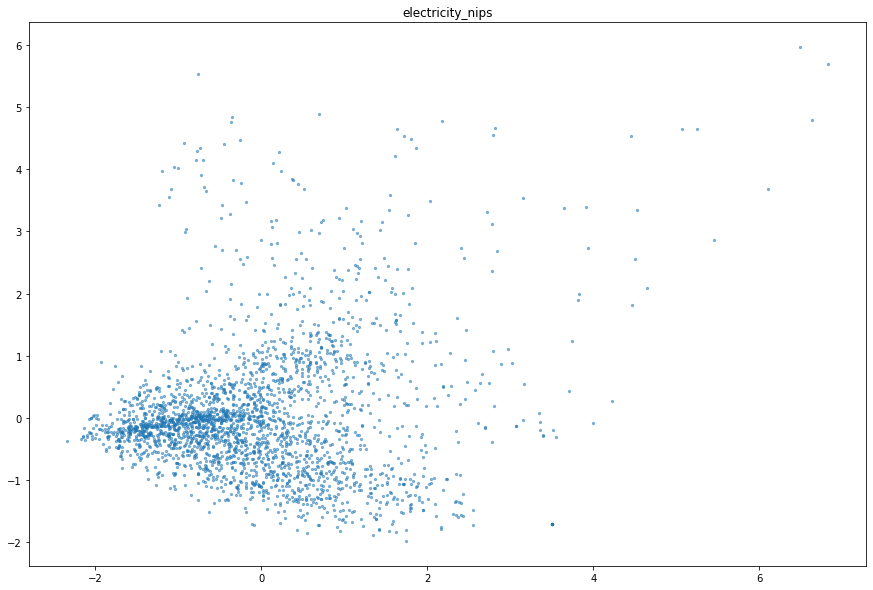

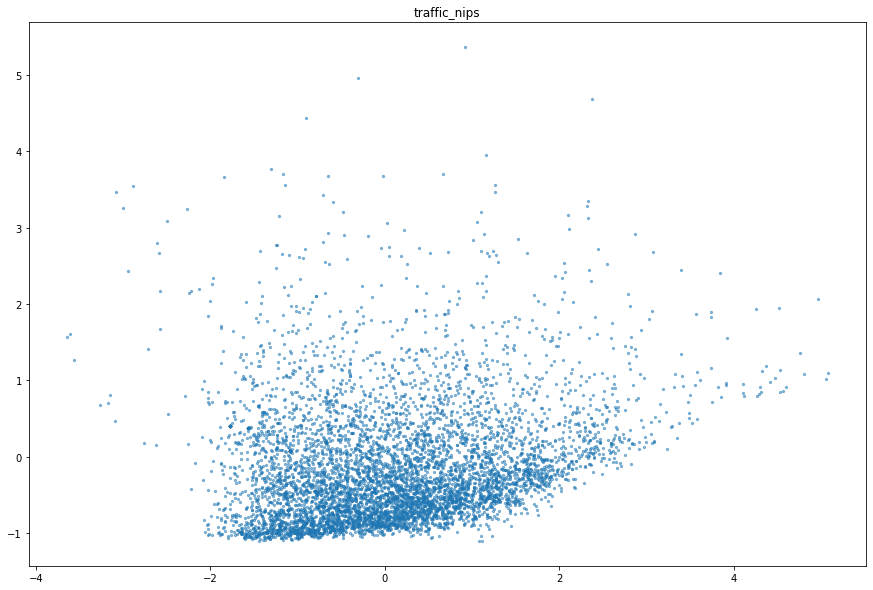

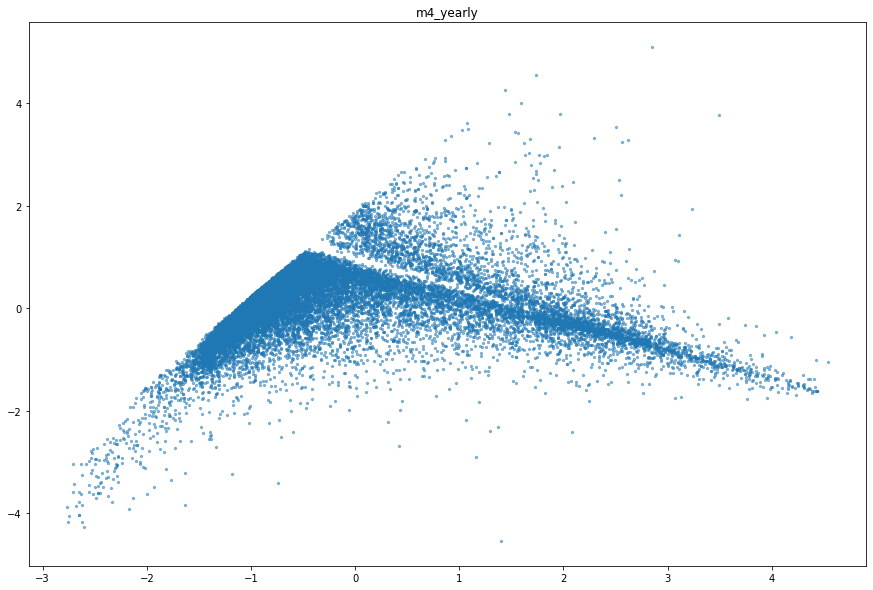

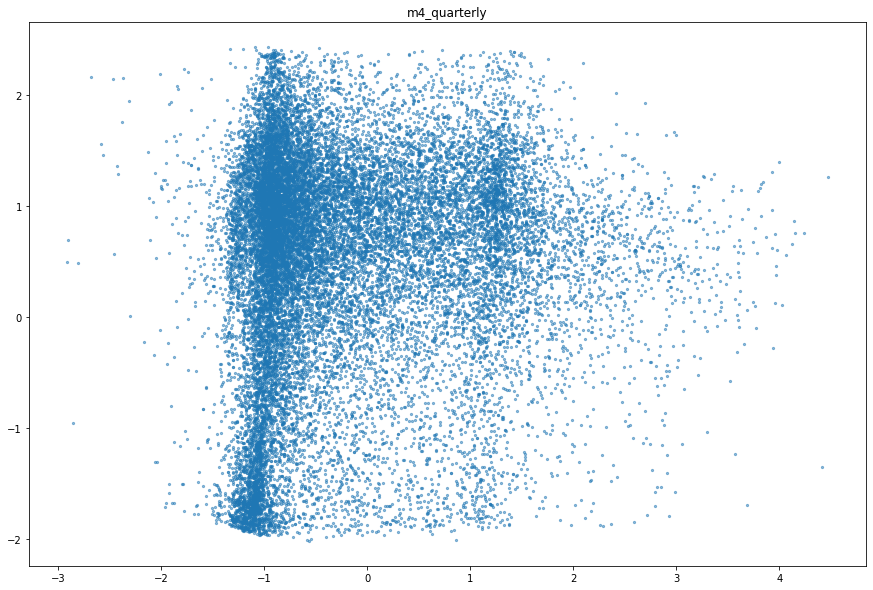

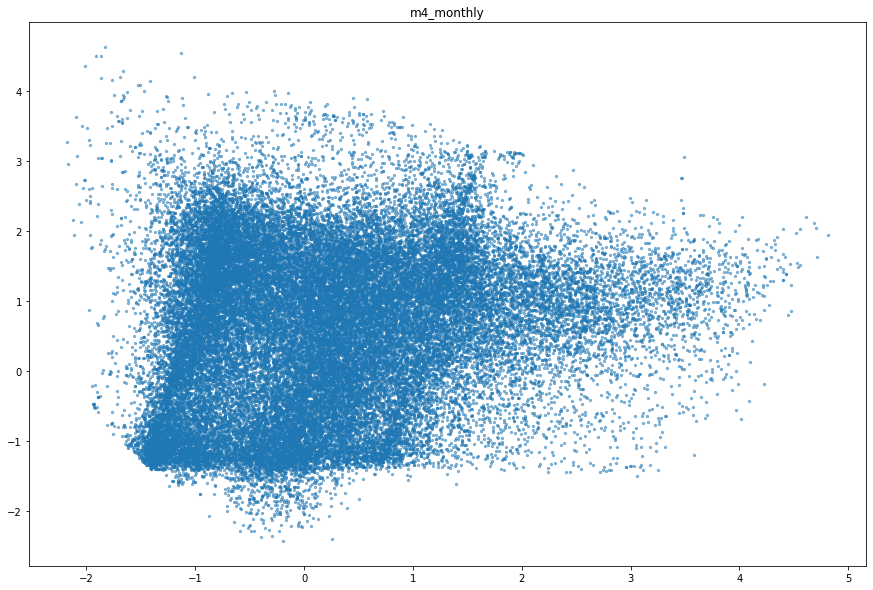

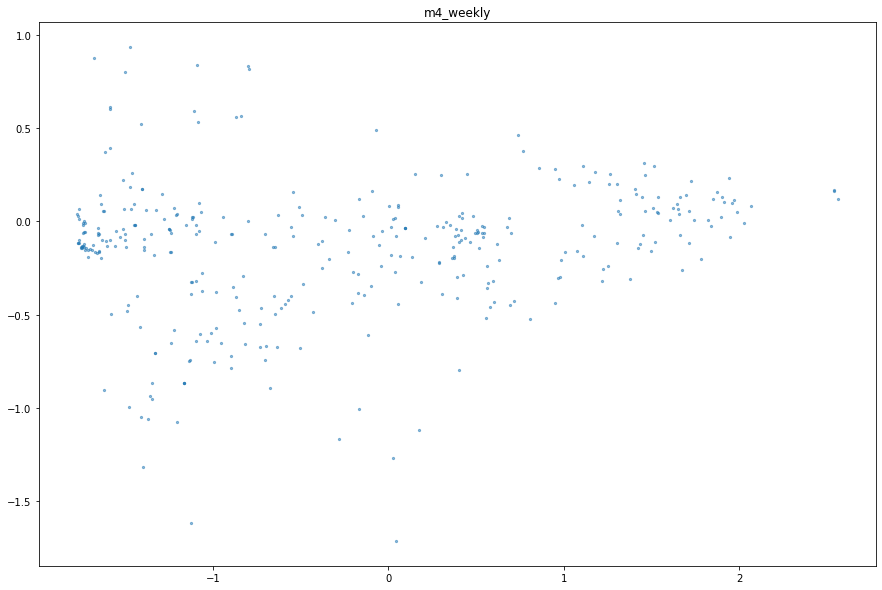

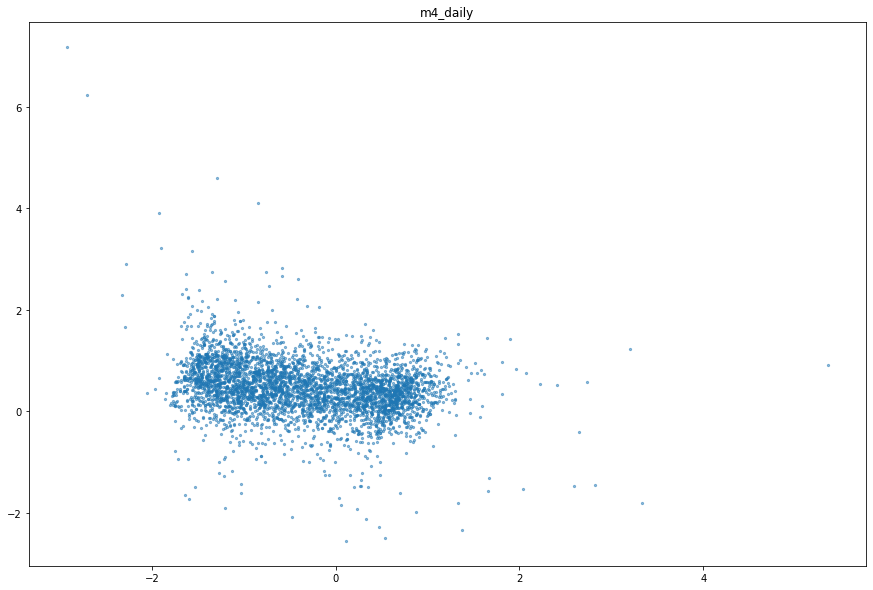

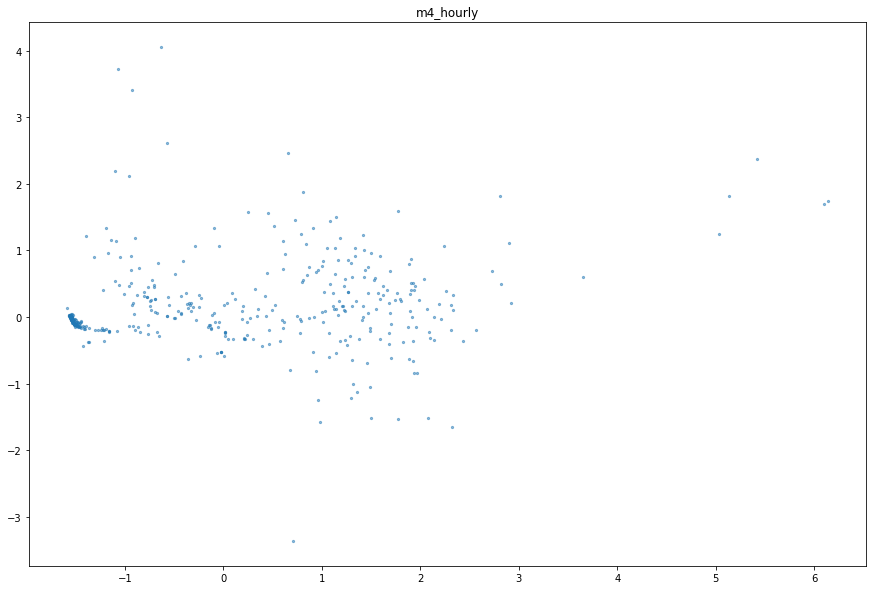

In [6]:
for dataset in datasets:
    datadir = f"data/{dataset}"
    
    train_features = load_features(datadir, train=True)
    test_features = load_features(datadir, train=False)
    
    scaler = StandardScaler()
    norm_train_features = scaler.fit_transform(train_features)
    norm_test_features = scaler.transform(test_features)
    
    pca = PCA(n_components=2)
    train_pca_data = pca.fit_transform(norm_train_features)
    test_pca_data = pca.transform(norm_test_features)
    
    plt.figure(figsize=(15, 10))
    plt.scatter(test_pca_data[:, 0], test_pca_data[:, 1], label="test data", s=5, alpha=0.5)
    plt.title(dataset)
    plt.savefig(os.path.join(save_dir, f"{dataset}.svg"))